In [73]:
import os
import sys

from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import random
import time

%matplotlib inline

In [74]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [75]:
## Test model
PATH_TO_GRAPH = r'tl_model/alex_lechner_model/ssd_udacity/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
#PATH_TO_GRAPH = r'models/chkpt_ssd_10K_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = r'data/lechner-dataset/udacity_label_map.pbtxt'
NUM_CLASSES = 4

In [76]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [ ]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

In [78]:
IMAGE_SIZE = (12, 8)

SCORES
[0.42959407 0.02257272 0.00831748 0.00494549 0.00409747 0.00274852
 0.00144506 0.0013438  0.00122666 0.00099955]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 3. 2. 4.]


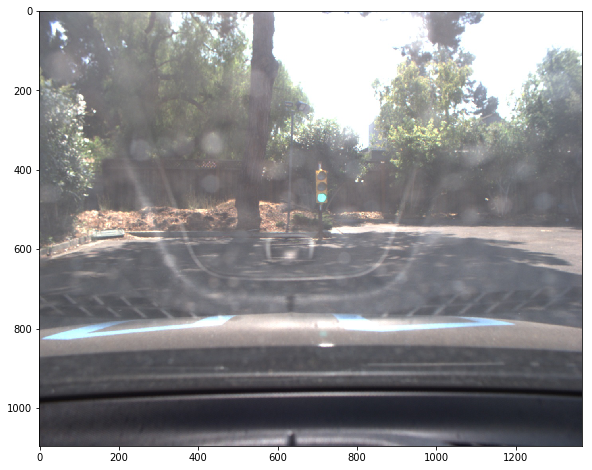

In [79]:
PATH_TO_IMGS = r'data/lechner-dataset/udacity_testarea_rgb'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx <= 20:
                break

In [80]:
# PATH_TO_GRAPH = r'tl_model/alex_lechner_model/ssd_sim/frozen_inference_graph.pb' ## load SSD trained on udacity's simulator images
PATH_TO_GRAPH = r'models/chkpt_ssd_20K_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb' ## load SSD trained on udacity's simulator images
detection_graph = load_graph(PATH_TO_GRAPH)

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0237.jpg
Time: 1615.6811714172363
SCORES
[0.99986756 0.9993556  0.99926895 0.0136069  0.00451216 0.00375624
 0.00368379 0.00368283 0.00341795 0.00336384]
CLASSES
[2. 2. 2. 2. 3. 4. 4. 3. 4. 1.]


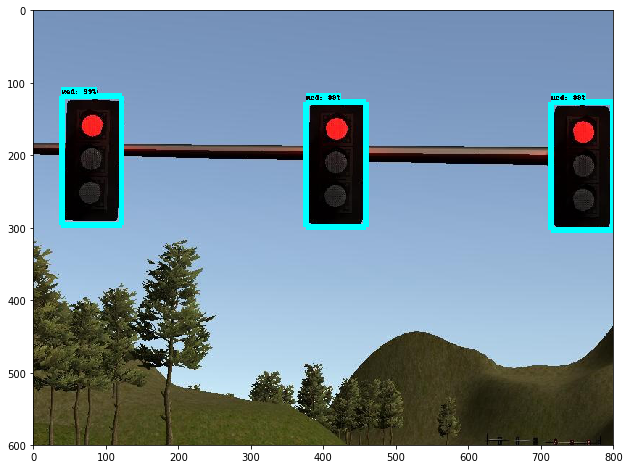

Image: data/lechner-dataset/simulator_dataset_rgb/Unknown/left0510.jpg
Time: 332.0479393005371
SCORES
[0.00990315 0.00464588 0.00439334 0.00430662 0.00430157 0.00426019
 0.00425467 0.00423963 0.00416739 0.00407636]
CLASSES
[2. 4. 1. 2. 1. 1. 4. 4. 1. 4.]


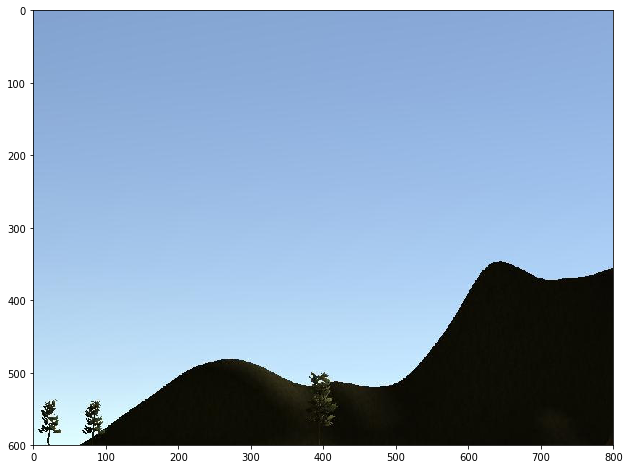

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0386.jpg
Time: 341.2361145019531
SCORES
[0.9950198  0.8519912  0.6856539  0.00554568 0.00533125 0.00533088
 0.00495787 0.00495528 0.0048396  0.00481148]
CLASSES
[2. 2. 2. 1. 2. 2. 2. 1. 2. 3.]


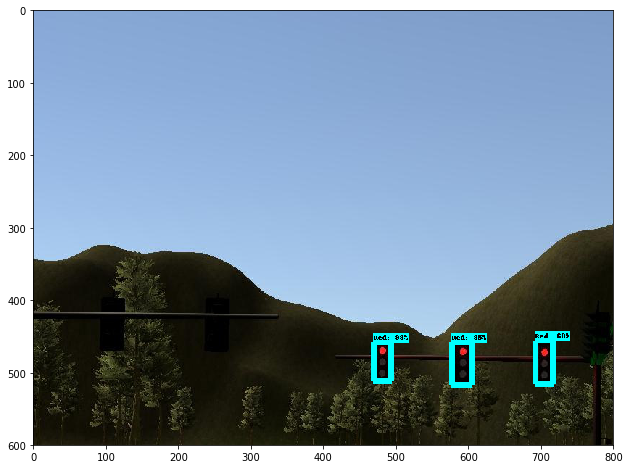

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0313.jpg
Time: 356.37712478637695
SCORES
[0.969586   0.9516611  0.01706995 0.00585325 0.00559931 0.00537717
 0.00527293 0.00512676 0.00511433 0.00501272]
CLASSES
[2. 2. 2. 4. 2. 3. 3. 3. 3. 1.]


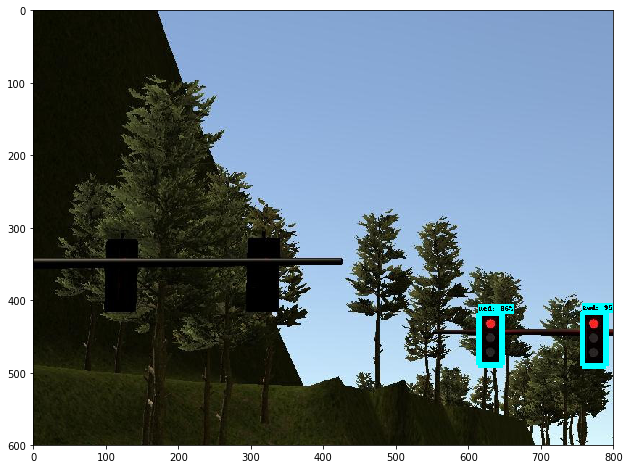

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0224.jpg
Time: 328.4730911254883
SCORES
[0.99986756 0.9993556  0.99926895 0.0136069  0.00451216 0.00375624
 0.00368379 0.00368283 0.00341795 0.00336384]
CLASSES
[2. 2. 2. 2. 3. 4. 4. 3. 4. 1.]


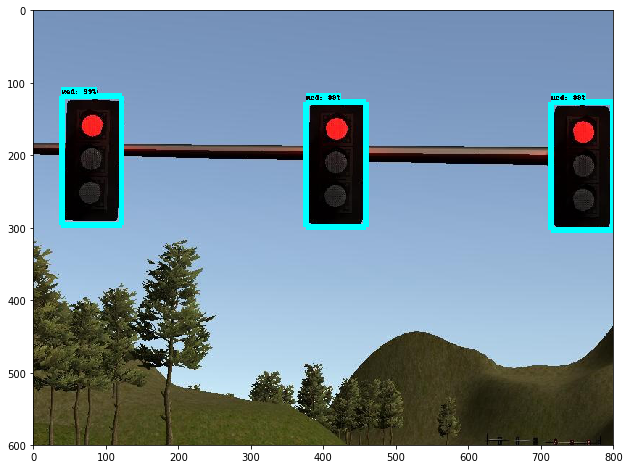

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0338.jpg
Time: 332.719087600708
SCORES
[0.9886839  0.9447502  0.88898045 0.0105971  0.00703942 0.00641175
 0.0060071  0.00522001 0.00500377 0.00490987]
CLASSES
[2. 2. 2. 2. 1. 1. 2. 3. 1. 1.]


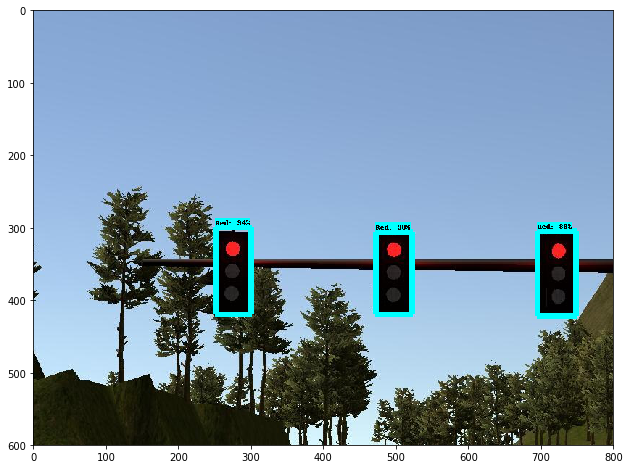

Image: data/lechner-dataset/simulator_dataset_rgb/Green/left0180.jpg
Time: 332.3860168457031
SCORES
[0.9989023  0.99611264 0.99582505 0.00679917 0.00454247 0.00451106
 0.00443485 0.00399336 0.00363216 0.00357864]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 1. 4. 4.]


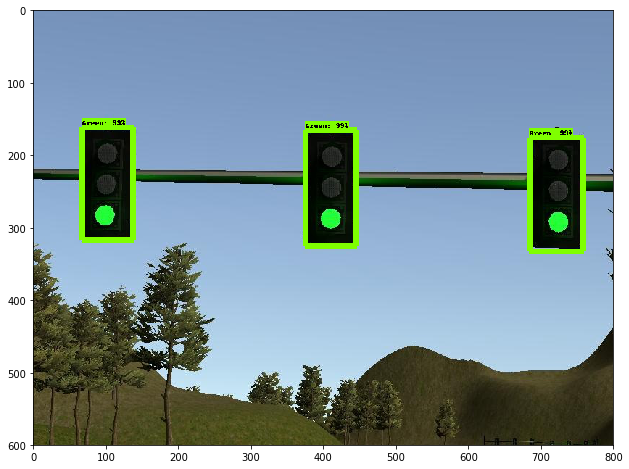

Image: data/lechner-dataset/simulator_dataset_rgb/Unknown/left0057.jpg
Time: 342.5130844116211
SCORES
[0.00566744 0.00541906 0.00535423 0.00513342 0.00497739 0.00470751
 0.0046251  0.00461859 0.00454045 0.00444183]
CLASSES
[3. 2. 1. 4. 4. 4. 2. 4. 4. 2.]


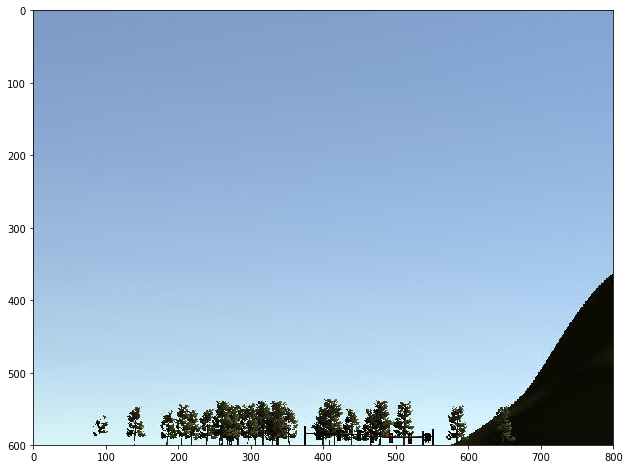

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0120.jpg
Time: 328.5069465637207
SCORES
[0.8752608  0.6924059  0.5437736  0.00630229 0.00570082 0.00560198
 0.00543164 0.00515353 0.00511745 0.00508875]
CLASSES
[2. 2. 2. 2. 2. 3. 2. 2. 3. 4.]


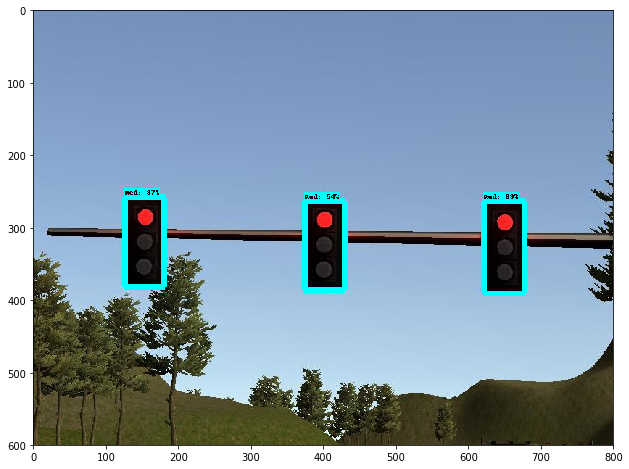

Image: data/lechner-dataset/simulator_dataset_rgb/Green/left0178.jpg
Time: 331.36892318725586
SCORES
[0.9989023  0.99611264 0.99582505 0.00679917 0.00454247 0.00451106
 0.00443485 0.00399336 0.00363216 0.00357864]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 1. 4. 4.]


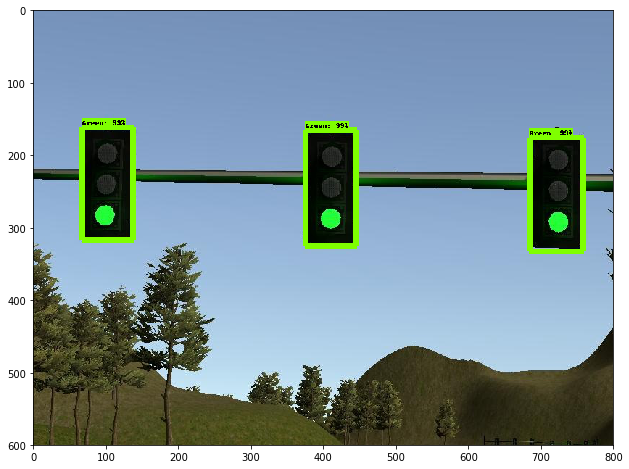

Image: data/lechner-dataset/simulator_dataset_rgb/Green/left0506.jpg
Time: 328.18102836608887
SCORES
[0.9997501  0.99959856 0.00866021 0.00470571 0.004344   0.00416134
 0.00402771 0.00393311 0.00386822 0.00385598]
CLASSES
[1. 1. 1. 1. 2. 3. 3. 4. 4. 4.]


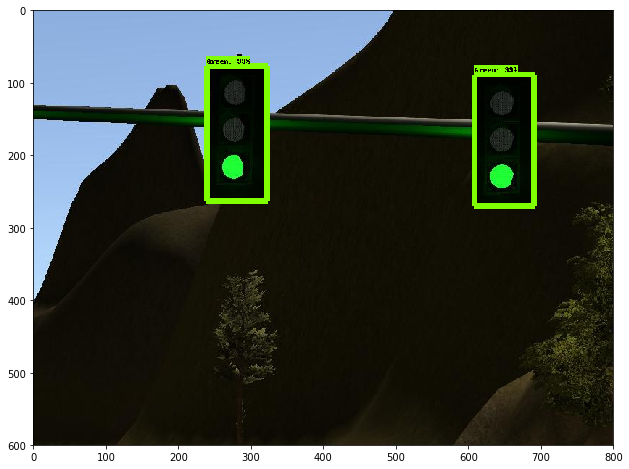

Image: data/lechner-dataset/simulator_dataset_rgb/Green/left0075.jpg
Time: 368.8380718231201
SCORES
[0.9876682  0.9459664  0.9196079  0.00689009 0.00686175 0.0065053
 0.00648234 0.00629673 0.0061757  0.00590929]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 1. 3. 4.]


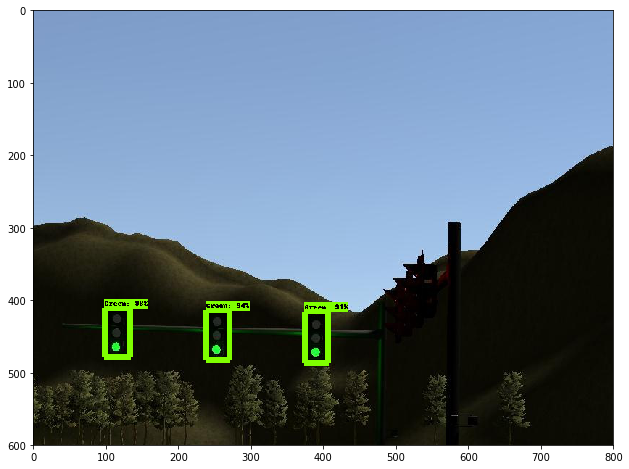

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0477.jpg
Time: 356.79006576538086
SCORES
[0.9184692  0.1371568  0.0078783  0.00658145 0.00624749 0.00600201
 0.00592813 0.00579244 0.00573815 0.00565194]
CLASSES
[2. 2. 4. 1. 3. 2. 1. 3. 1. 3.]


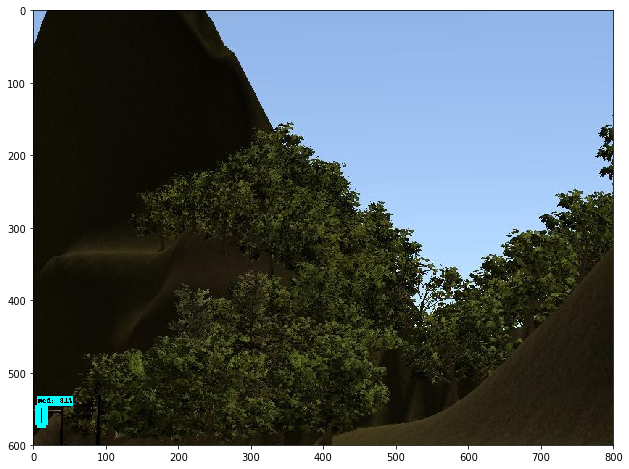

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0297.jpg
Time: 331.4480781555176
SCORES
[0.9946017  0.96852005 0.89390546 0.01283684 0.01007764 0.01006712
 0.00967222 0.00589188 0.00587821 0.00509892]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 3. 3.]


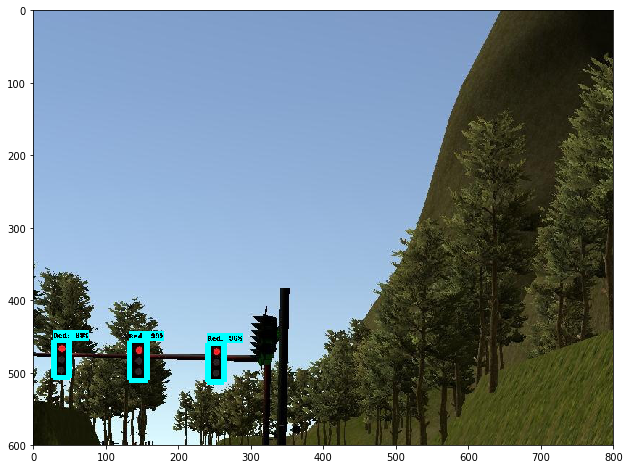

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0122.jpg
Time: 334.3050479888916
SCORES
[0.8752608  0.6924059  0.5437736  0.00630229 0.00570082 0.00560198
 0.00543164 0.00515353 0.00511745 0.00508875]
CLASSES
[2. 2. 2. 2. 2. 3. 2. 2. 3. 4.]


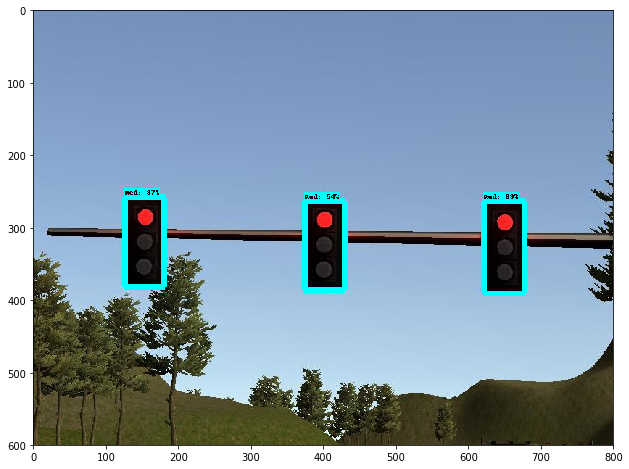

Image: data/lechner-dataset/simulator_dataset_rgb/Unknown/left0441.jpg
Time: 331.5470218658447
SCORES
[0.00863015 0.00842317 0.00817315 0.00656027 0.00648726 0.00623438
 0.0059275  0.00537778 0.0052643  0.00517519]
CLASSES
[1. 3. 3. 1. 2. 1. 1. 4. 3. 4.]


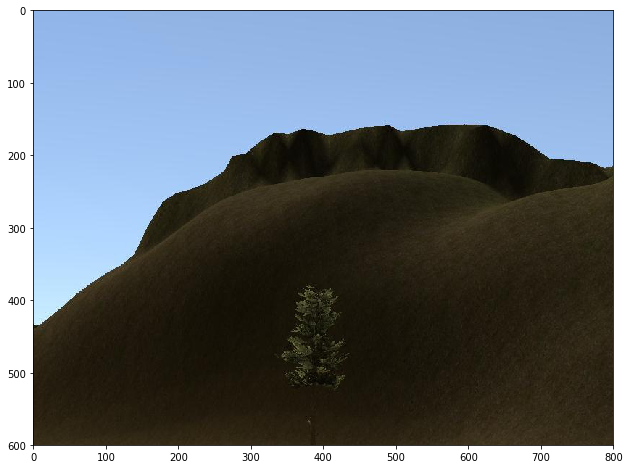

Image: data/lechner-dataset/simulator_dataset_rgb/Green/left0159.jpg
Time: 336.1339569091797
SCORES
[0.9987877  0.99612    0.99591845 0.00679732 0.00454562 0.00419922
 0.00398399 0.0039493  0.00355929 0.00351039]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 1. 4. 1.]


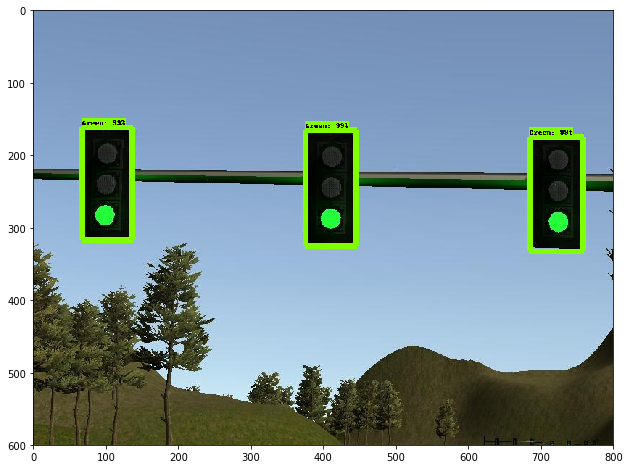

Image: data/lechner-dataset/simulator_dataset_rgb/Green/left0087.jpg
Time: 344.35486793518066
SCORES
[0.8814997  0.8138649  0.38313314 0.00507292 0.00453252 0.00417033
 0.00416637 0.0041059  0.00407147 0.00398269]
CLASSES
[1. 1. 1. 1. 4. 4. 4. 3. 4. 1.]


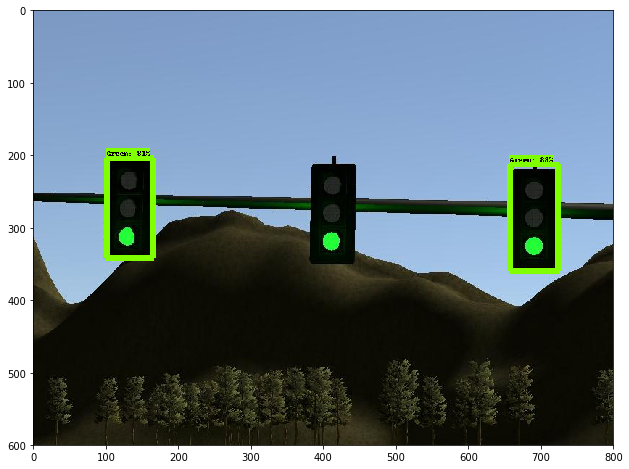

Image: data/lechner-dataset/simulator_dataset_rgb/Unknown/left0061.jpg
Time: 341.2899971008301
SCORES
[0.434053   0.13972804 0.06149321 0.03138728 0.01344531 0.00782223
 0.00770873 0.00702487 0.00600532 0.00578058]
CLASSES
[2. 1. 2. 2. 2. 1. 3. 4. 2. 3.]


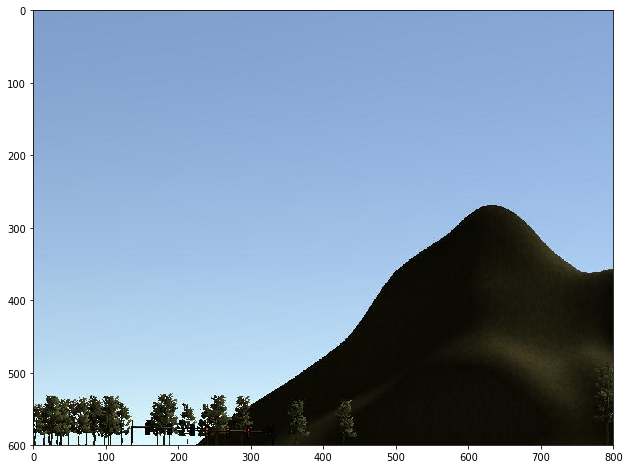

Image: data/lechner-dataset/simulator_dataset_rgb/Green/left0088.jpg
Time: 330.90686798095703
SCORES
[0.9531932  0.8819259  0.5841315  0.00526415 0.00517715 0.00459605
 0.00451826 0.0042676  0.00406308 0.00379709]
CLASSES
[1. 1. 1. 1. 1. 3. 4. 1. 3. 3.]


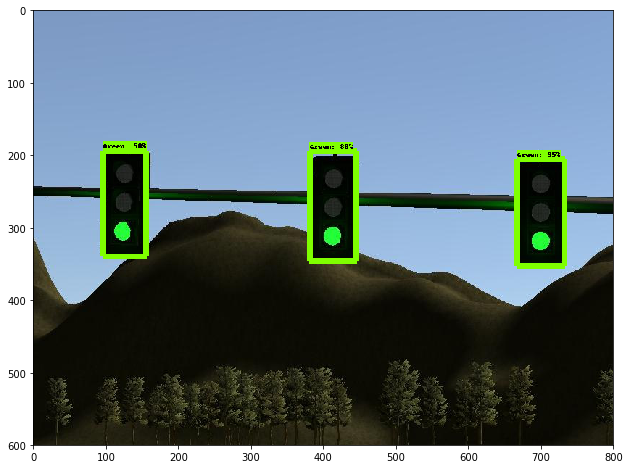

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0216.jpg
Time: 336.7271423339844
SCORES
[0.9998795  0.9993111  0.999278   0.01313625 0.0043234  0.0038192
 0.00375659 0.00370872 0.00338423 0.00337138]
CLASSES
[2. 2. 2. 2. 3. 3. 4. 4. 4. 1.]


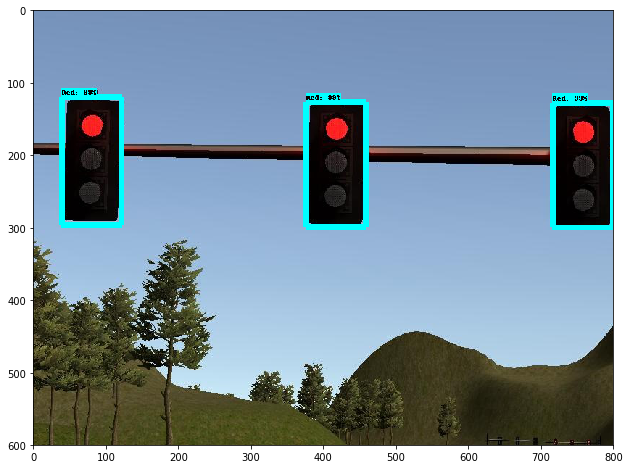

Image: data/lechner-dataset/simulator_dataset_rgb/Green/left0185.jpg
Time: 333.0049514770508
SCORES
[0.99896467 0.9977666  0.9941111  0.00554013 0.0051736  0.00457121
 0.0044823  0.00375593 0.00340437 0.00336082]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 4. 4. 4.]


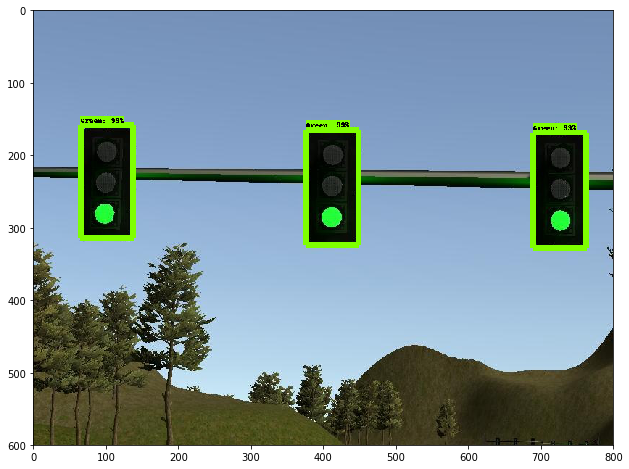

Image: data/lechner-dataset/simulator_dataset_rgb/Unknown/left0051.jpg
Time: 341.34793281555176
SCORES
[0.00457505 0.0044674  0.00446403 0.00439052 0.00428835 0.00423297
 0.00420832 0.00411604 0.00408237 0.00406824]
CLASSES
[4. 2. 4. 1. 4. 2. 4. 1. 1. 4.]


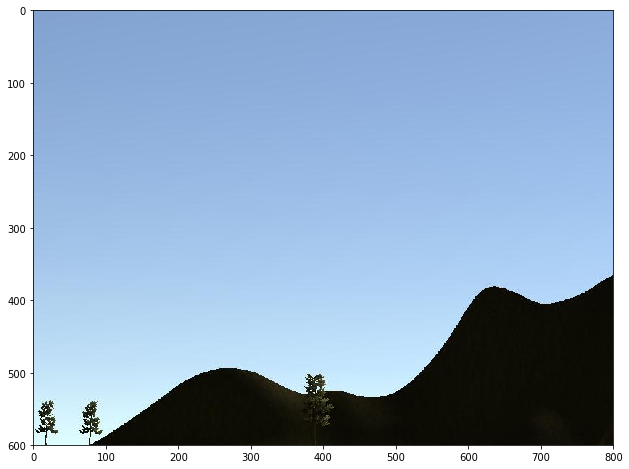

Image: data/lechner-dataset/simulator_dataset_rgb/Green/left0396.jpg
Time: 340.8529758453369
SCORES
[0.9870099  0.976294   0.52130103 0.01238887 0.00624431 0.00586221
 0.00579224 0.00575739 0.00549517 0.00541537]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 4. 1. 1.]


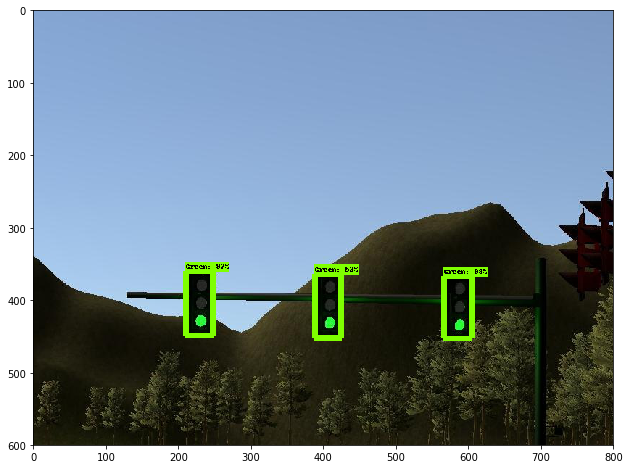

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0244.jpg
Time: 333.47201347351074
SCORES
[0.9832349  0.9481183  0.7725301  0.01664615 0.01429993 0.01337997
 0.01268877 0.0102681  0.00828392 0.0082112 ]
CLASSES
[2. 2. 2. 1. 2. 1. 2. 2. 1. 4.]


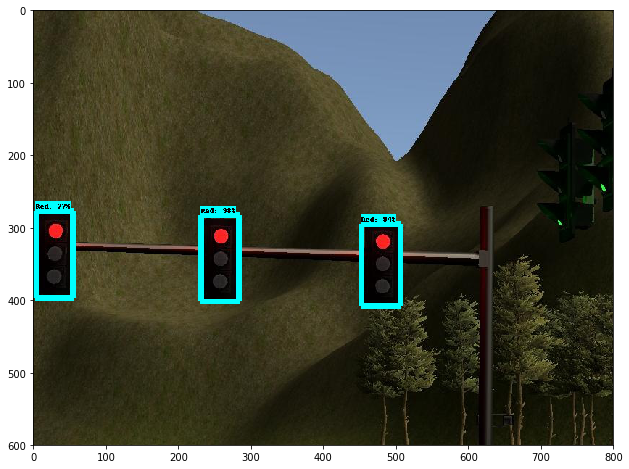

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0015.jpg
Time: 342.5869941711426
SCORES
[0.97883713 0.14232358 0.00766338 0.00613918 0.00611762 0.00594384
 0.00591547 0.00587522 0.00583362 0.00573076]
CLASSES
[2. 2. 4. 1. 2. 3. 3. 3. 3. 3.]


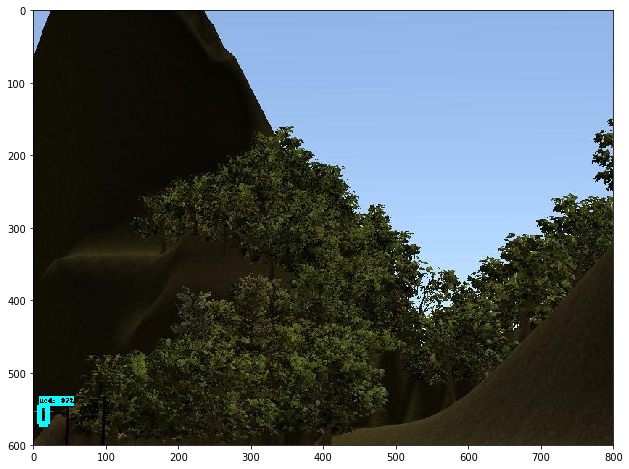

Image: data/lechner-dataset/simulator_dataset_rgb/Green/left0068.jpg
Time: 335.48498153686523
SCORES
[0.98869485 0.9710226  0.83795834 0.01047235 0.00758779 0.00725849
 0.00686348 0.00648241 0.00582789 0.00518796]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


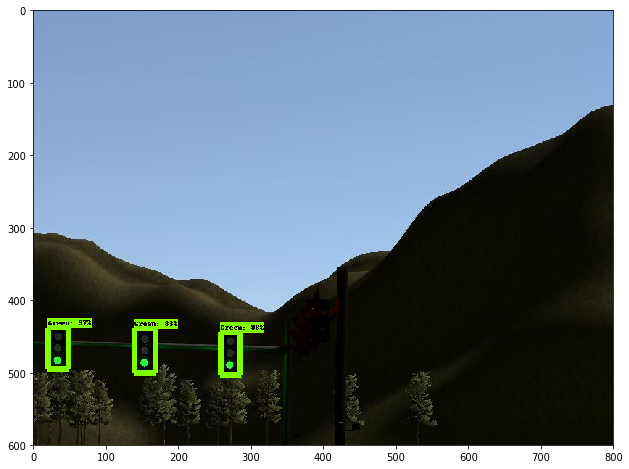

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0353.jpg
Time: 346.82607650756836
SCORES
[0.97829324 0.96771854 0.81038713 0.01205281 0.00516122 0.00514966
 0.00457939 0.00443969 0.00383844 0.00370959]
CLASSES
[2. 2. 2. 2. 2. 2. 4. 4. 2. 1.]


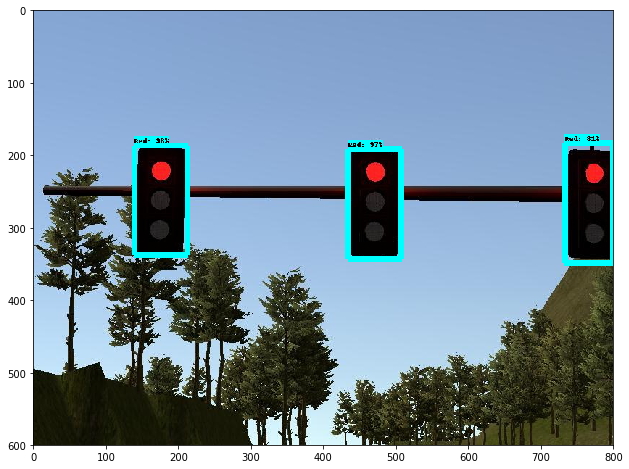

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0302.jpg
Time: 337.6200199127197
SCORES
[0.99208426 0.9733112  0.02195957 0.00989175 0.00587697 0.00585356
 0.00579307 0.00550568 0.00539058 0.00508962]
CLASSES
[2. 2. 2. 2. 3. 1. 3. 1. 4. 2.]


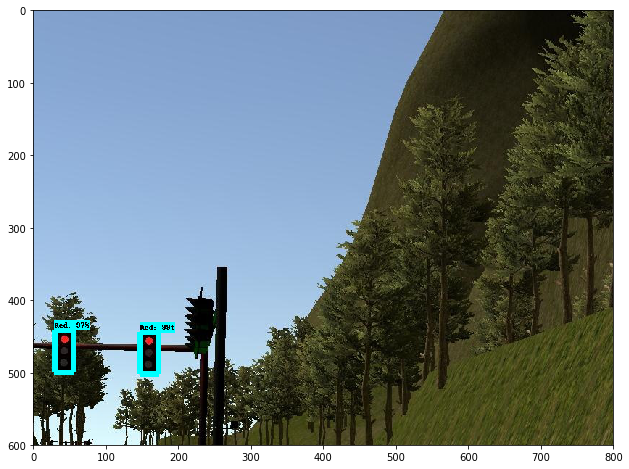

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0012.jpg
Time: 338.93704414367676
SCORES
[0.98447    0.24102506 0.00754702 0.00690208 0.00628496 0.00607921
 0.00576459 0.00575342 0.00568483 0.00555073]
CLASSES
[2. 2. 3. 3. 4. 4. 3. 3. 3. 3.]


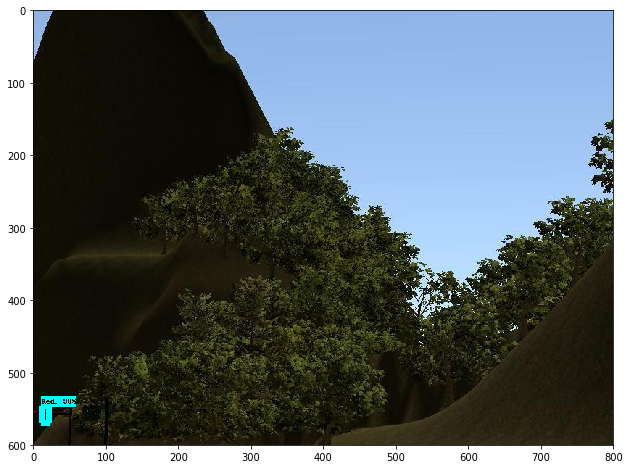

Image: data/lechner-dataset/simulator_dataset_rgb/Red/left0262.jpg
Time: 337.75997161865234
SCORES
[0.95174617 0.93376887 0.41872647 0.07166322 0.02954627 0.00886523
 0.00873032 0.00677213 0.00665361 0.00651279]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


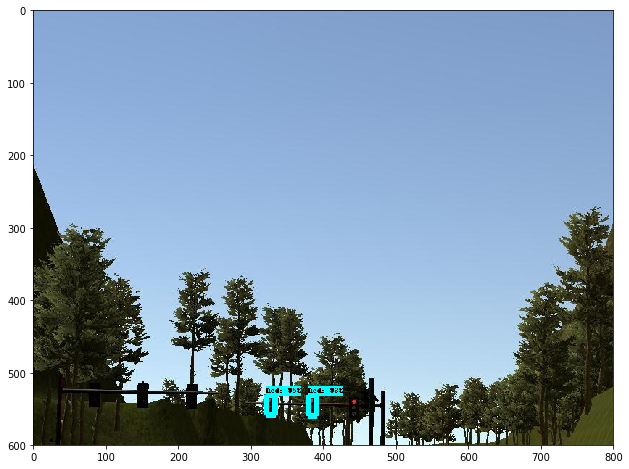

In [82]:
PATH_TO_IMGS = r'data/lechner-dataset/simulator_dataset_rgb'
subfolder = ['Green', 'Red', 'Yellow', 'Unknown']
TEST_IMGS = []
for i in subfolder:
    TEST_IMGS += glob(os.path.join(os.path.join(PATH_TO_IMGS, i), r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            start_t = time.time()
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            
            print('Image: ' + img_path)
            print ('Time: ' + str((time.time() - start_t)*1000))
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            
            # plt.figure(figsize=IMAGE_SIZE)
            # plt.imshow(load_image_into_numpy_array(image))
            # plt.show()
        
            if idx == 30:
                break